In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [57]:
df_ecom = pd.read_csv(
    "ecommerce_data.csv",          # change path if needed
    encoding="ISO-8859-1",
    engine="python",
    sep=",",
    quoting=csv.QUOTE_NONE,
    on_bad_lines="skip"
)

df_ecom.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
 df_ecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537113 entries, 0 to 537112
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    537113 non-null  object 
 1   StockCode    537113 non-null  object 
 2   Description  535659 non-null  object 
 3   Quantity     537113 non-null  int64  
 4   InvoiceDate  537113 non-null  object 
 5   UnitPrice    537113 non-null  float64
 6   CustomerID   403722 non-null  float64
 7   Country      537113 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [59]:
df_ecom.describe()


,Quantity,UnitPrice,CustomerID
count,537113.000000,537113.000000,403722.000000
mean,9.597027,4.630645,15287.768997
std,153.149401,97.190066,1713.989586
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [60]:
df_ecom.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133391
Country,0


In [61]:
# Convert Quantity to numeric
df_ecom["Quantity"] = pd.to_numeric(df_ecom["Quantity"], errors="coerce")

# Remove invalid quantity rows
df_ecom = df_ecom.dropna(subset=["Quantity"])


In [62]:
product_sales = (
    df_ecom
    .groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

product_sales


,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


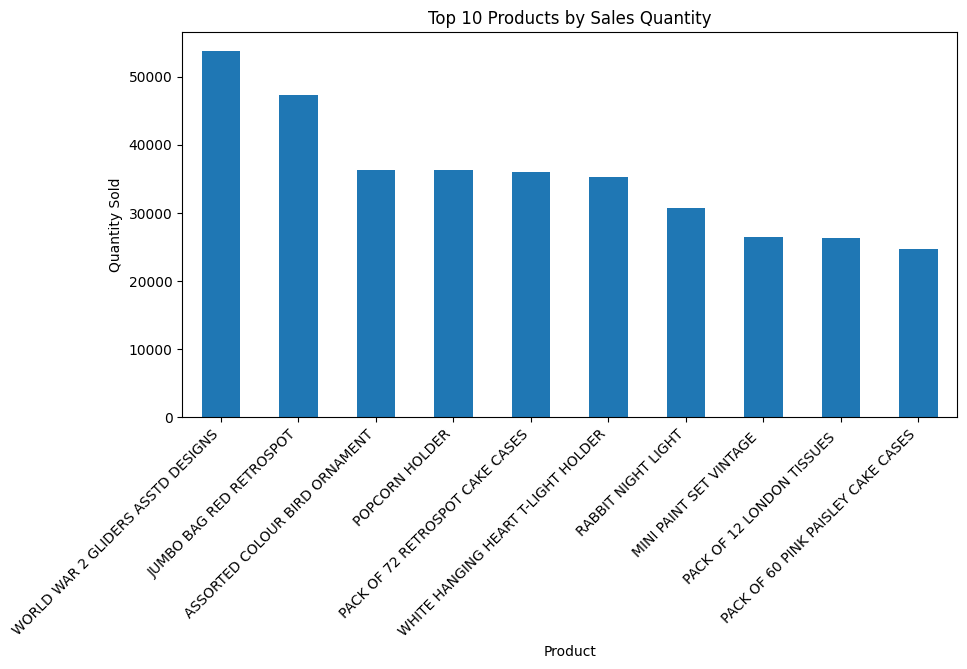

In [63]:
plt.figure(figsize=(10,5))
product_sales.plot(kind="bar")
plt.title("Top 10 Products by Sales Quantity")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()


In [64]:
df_ecom["InvoiceDate"] = pd.to_datetime(
    df_ecom["InvoiceDate"], errors="coerce"
)

df_ecom = df_ecom.dropna(subset=["InvoiceDate"])

daily_sales = (
    df_ecom
    .groupby(df_ecom["InvoiceDate"].dt.date)["Quantity"]
    .sum()
)


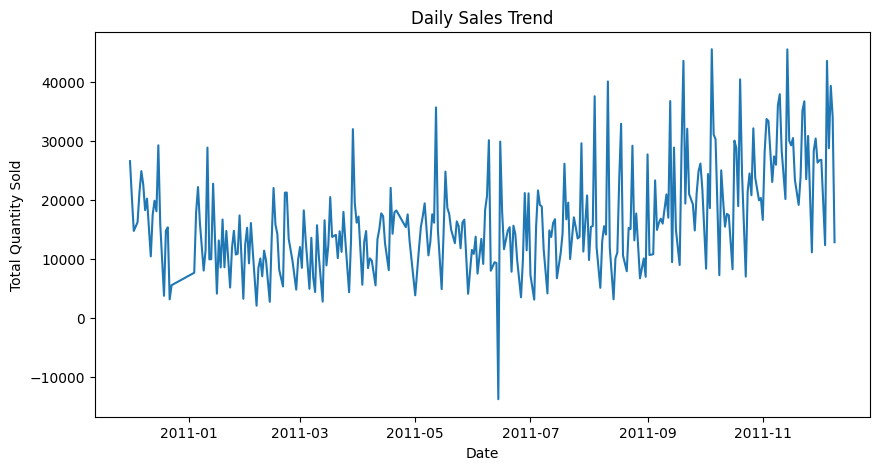

In [65]:
plt.figure(figsize=(10,5))
plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.show()


In [66]:
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
df_health = pd.read_csv("diabetes.csv")
df_health.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df_health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
df_health.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
df_health.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [71]:
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df_health[zero_cols] = df_health[zero_cols].replace(0, pd.NA)


In [72]:
df_health.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


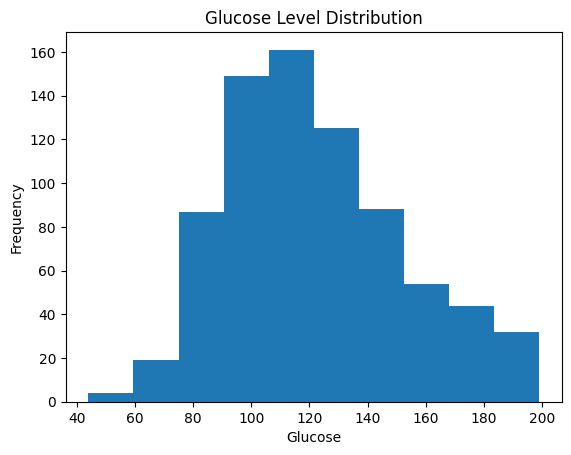

In [73]:
plt.figure()
plt.hist(df_health["Glucose"].dropna())
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()


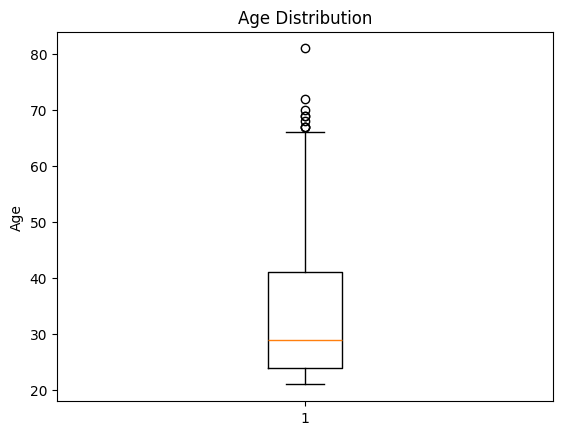

In [74]:
plt.figure()
plt.boxplot(df_health["Age"])
plt.title("Age Distribution")
plt.ylabel("Age")
plt.show()


In [75]:
health_stats = df_health.groupby("Outcome")[["Glucose", "BMI", "Age"]].mean()
health_stats


,Glucose,BMI,Age
Outcome,,,
0,110.643863,30.859674,31.190000
1,142.319549,35.406767,37.067164


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df_house = pd.read_csv("housing.csv")
df_house.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [78]:
df_house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [79]:
df_house.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [80]:
df_house.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


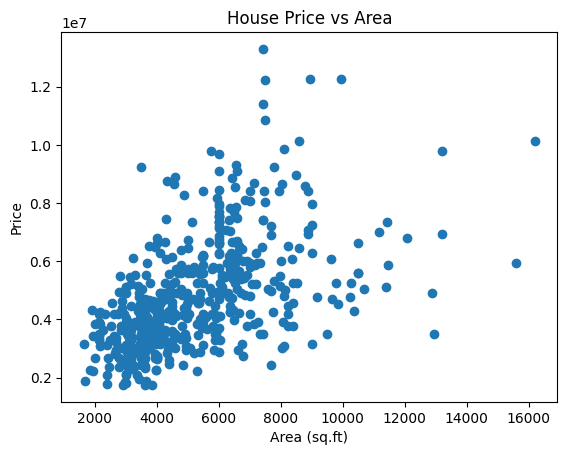

In [81]:
plt.figure()
plt.scatter(df_house["area"], df_house["price"])
plt.title("House Price vs Area")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.show()


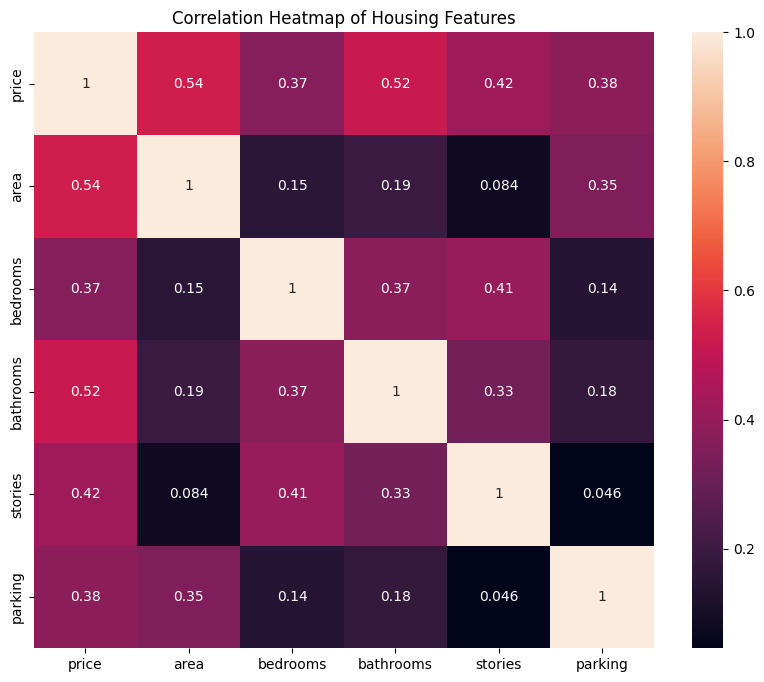

In [82]:
# Select only numerical columns
numeric_df = df_house.select_dtypes(include="number")

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap of Housing Features")
plt.show()


In [83]:
numeric_df.corr()["price"].sort_values(ascending=False)


,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [85]:
os.getcwd()
os.listdir()


['.config',
 'marketing_campaign.csv',
 'housing.csv',
 'ecommerce_data.csv',
 'diabetes.csv',
 'sample_data']

In [86]:
df_bank = pd.read_csv("marketing_campaign.csv", sep="\t")
df_bank.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [87]:
df_bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [88]:
df_bank.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [89]:
df_bank.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [90]:
df_bank["Age"] = 2026 - df_bank["Year_Birth"]


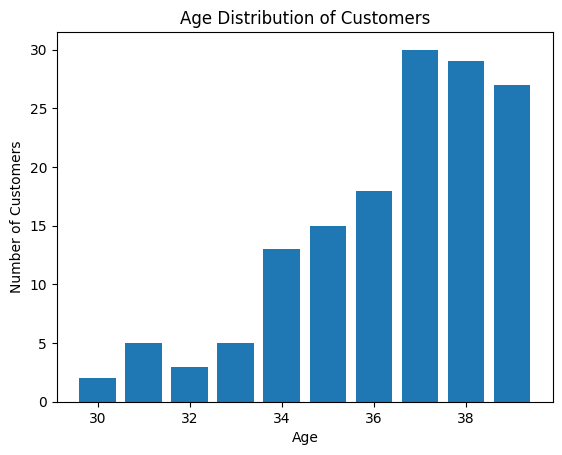

In [91]:
age_counts = df_bank["Age"].value_counts().sort_index().head(10)

plt.figure()
plt.bar(age_counts.index, age_counts.values)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


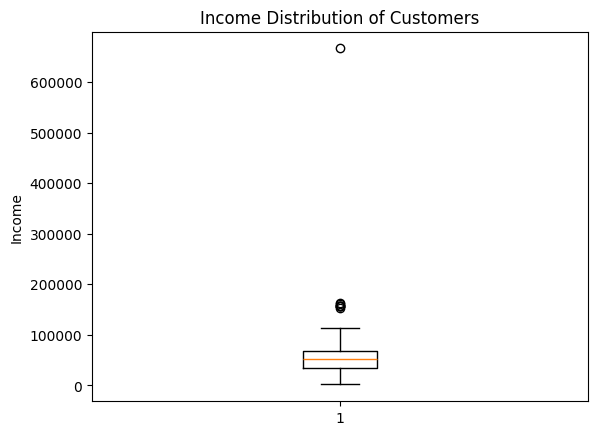

In [92]:
plt.figure()
plt.boxplot(df_bank["Income"].dropna())
plt.title("Income Distribution of Customers")
plt.ylabel("Income")
plt.show()


In [93]:
spending_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

df_bank["Total_Spending"] = df_bank[spending_cols].sum(axis=1)
df_bank["Total_Spending"].describe()


,Total_Spending
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


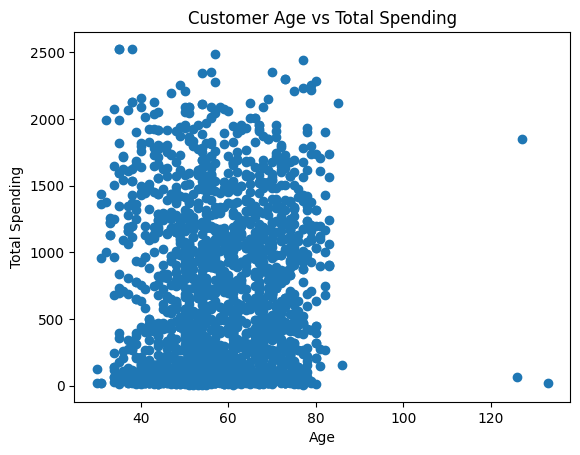

In [94]:
plt.figure()
plt.scatter(df_bank["Age"], df_bank["Total_Spending"])
plt.title("Customer Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.show()
